In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [2]:
import requests_cache
session = requests_cache.CachedSession("yfinance.cache")

In [3]:
aapl = yf.Ticker("AAPL")
msft = yf.Ticker("MSFT")
nvda = yf.Ticker("NVDA")
meta = yf.Ticker("META")
voo = yf.Ticker("VOO")

aapl_hist = aapl.history(start="2021-01-01", end="2021-12-31")
msft_hist = msft.history(start="2021-01-01", end="2021-12-31")
nvda_hist = nvda.history(start="2021-01-01", end="2021-12-31")
meta_hist = meta.history(start="2021-01-01", end="2021-12-31")
voo_hist = voo.history(start="2021-01-01", end="2021-12-31")

df = pd.DataFrame({
    "Apple": aapl_hist["Close"],
    "Microsoft": msft_hist["Close"],
    "NVIDIA": nvda_hist["Close"],
    "Meta": meta_hist["Close"],
    "S&P 500": voo_hist["Close"]
})

df.head()

,Apple,Microsoft,NVIDIA,Meta,S&P 500
Date,,,,,
2021-01-04 00:00:00-05:00,127.331718,212.426895,130.851593,268.940002,326.228851
2021-01-05 00:00:00-05:00,128.905975,212.631821,133.757828,270.970001,328.374695
2021-01-06 00:00:00-05:00,124.566826,207.118408,125.872383,263.309998,330.366516
2021-01-07 00:00:00-05:00,128.817429,213.012375,133.151642,268.739990,335.302795
2021-01-08 00:00:00-05:00,129.929291,214.310226,132.480591,267.570007,337.188873


Text(0, 0.5, 'Price (USD)')

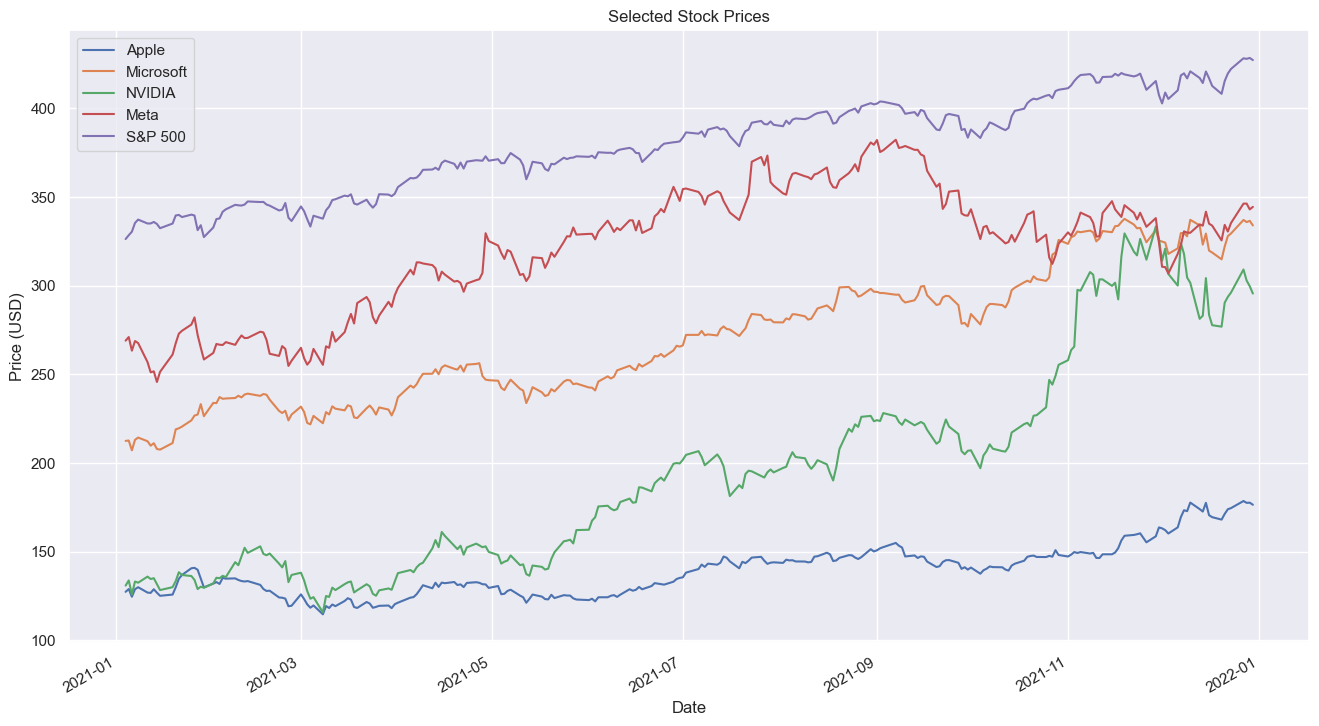

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))
df.plot(ax=ax)
ax.set_title("Selected Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")

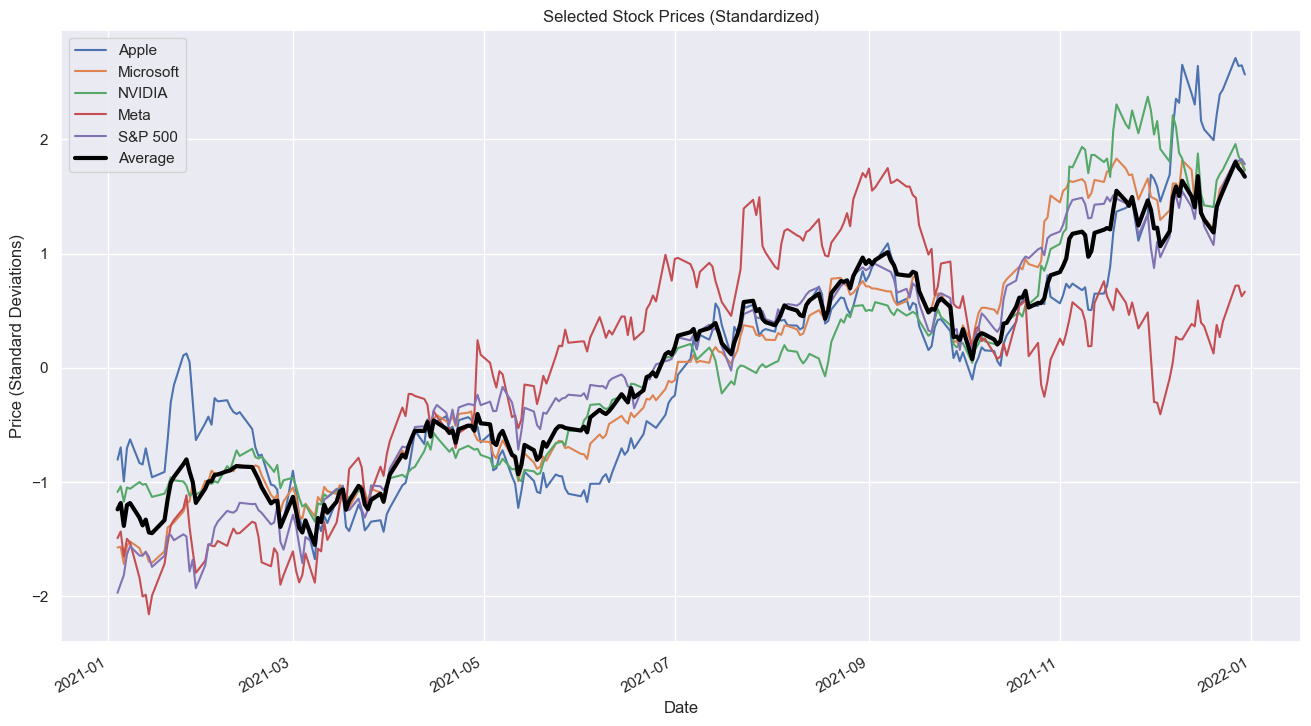

In [5]:
# Standardize the Close column of each stock
df_std = (df - df.mean()) / df.std()

# average at each date
avg = df_std.drop("S&P 500", axis=1).mean(axis=1)

fig, ax = plt.subplots(figsize=(16, 9))
df_std.plot(ax=ax)
ax.plot(avg, color="black", label="Average", linewidth=3)
ax.set_title("Selected Stock Prices (Standardized)")
ax.set_xlabel("Date")
ax.set_ylabel("Price (Standard Deviations)")
ax.legend()

In [6]:
# Correlation between avg and VOO
corr = avg.corr(df_std["S&P 500"])
print(f"Correlation between avg and VOO: {corr*100:.4f}%")

Correlation between avg and VOO: 97.2309%


In [5]:
sp500 = pd.read_csv("./data/sp500-firms.csv")
sp500_tickers = sp500["Symbol"].values

In [3]:
sp500_data = yf.download(["META", "GOOGL", "NFLX", "AMZN", "TSLA", "HD", "PG", "COST", "PEP", "XOM", "CVX", "COP", "MA", "JPM", "V", "UNH", "JNJ", "LLY", "UNP", "BA", "CAT", "LIN", "SHW", "FCX", "PLD", "AMT", "EQIX", "MSFT", "AAPL", "AVGO", "NEE", "SO", "DUK"], period="10y", interval="1d")

[*********************100%%**********************]  33 of 33 completed


In [6]:
sp500_data["Volume"]

,AAPL,AMT,AMZN,AVGO,BA,CAT,COP,COST,CVX,DUK,...,PEP,PG,PLD,SHW,SO,TSLA,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-06,412610800,2426700,63412000,1263400,4196500,5233900,4418300,2120200,4252300,2470000,...,3888400,7208200,3030600,1752300,4527000,80416500,3424500,3741200,8577600,11848500
2014-01-07,317209200,2570500,38320000,1335900,4238500,3512100,3659500,2292500,4563300,2772200,...,6332400,7158200,2850100,3716100,4705500,75511500,6542500,3135200,8178000,11187000
2014-01-08,258529600,2469300,46330000,2296800,4236100,4421600,6405300,4600000,8282500,3881300,...,5653300,13458800,2382900,3745200,4268100,92448000,6172200,4462600,8487200,11180400
2014-01-09,279148800,2084200,42060000,1233900,4052500,4466400,4078900,5759400,5643500,2379900,...,4565900,10833900,2916900,2044200,3898700,80730000,6291500,4533800,8386400,11674300
2014-01-10,304976000,2093900,53590000,1669100,4549500,5416000,4799400,2790200,8127500,4036300,...,3712000,8448300,1721500,2795400,6171100,111691500,6632200,5088000,6429600,10535400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,48087700,1860500,31434700,2005500,3484900,1876500,3441400,1875900,5337200,1987600,...,3502500,4569400,2714600,694100,2771900,106494400,1851800,2206000,4034700,14558800
2023-12-28,34049900,1125400,27057000,2124700,5096400,2267400,3711400,1496900,8148000,1912700,...,2911100,5023000,1953100,664200,2790500,113619900,2001000,1208500,3020500,16329300
2023-12-29,42628800,1584400,39789000,2054900,3681900,2300600,3643300,1947000,7653800,2295300,...,3291500,5300900,2938000,682000,2895500,100615300,2080100,1228700,4074600,17741400


In [ ]:
import pickle as pkl
with open("sp500_data.pkl", "wb") as f:
    pkl.dump(sp500_data, f)